In [1]:
# Primera parte: definición del modelo

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Función modelo


def model(N,t,mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n, ep_h):
    s_h, i_h, r_h = N[0:3] # Poblaciones humanas
    s_rd, i_rd = N[3:5] # Poblaciones de reservorios domesticos
    s_vd, i_vd = N[5:7] # Poblaciones vectores domesticos
    s_rs, i_rs = N[7:9] # Poblaciones reservorios silvestres
    s_vs, i_vs = N[9:11] # Poblacicones vectores silvestres
    
    # Ecuaciones diferenciales del modelo
        # Ecuaciones en humanos
    dsh_dt = mu_h*(s_h + i_h + r_h) + ep_h*r_h - mu_h*s_h -((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h)) 
    dih_dt = ((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h)) - gamma_h*i_h - mu_h*i_h 
    drh_dt = (gamma_h*i_h) - (ep_h*r_h) - (mu_h*r_h)
        # Ecuaciones en reservorios domesticos
    dsrd_dt = mu_rd*(s_rd + i_rd) + gamma_rd*i_rd - mu_rd*s_rd -((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd))
    dird_dt = ((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd)) - gamma_rd*i_rd - mu_rd*i_rd
        # Ecuaciones vectores domesticos
    dsvd_dt = mu_vd*(s_vd + i_vd) - mu_vd*s_vd -(((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+
                                                 ((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs)))
    divd_dt = (((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+
               ((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs))) - mu_vd*i_vd
        # Ecuaciones reservorios silvestres
    dsrs_dt = mu_rs*(s_rs + i_rs) + gamma_rs*i_rs - mu_rs*s_rs -(((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs))
    dirs_dt = (((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs)) - gamma_rs*i_rs - mu_rs*i_rs
        # Ecuaciones vectores silvestres
    dsvs_dt = mu_vs*(s_vs + i_vs) - mu_vs*s_vs - (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs))
    divs_dt = (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs)+((1-tao_h)*a_h*p_vh*i_h*s_vs)/(s_h +i_h)) - mu_vs*i_vs

    return [dsh_dt,dih_dt,drh_dt,dsrd_dt,dird_dt,dsvd_dt,divd_dt,dsrs_dt,dirs_dt,dsvs_dt,divs_dt]

In [ ]:
# Segunda parte establecimiento de los parametros
mu_h = 1/25550 # Tasa de muertes en humanos [1/día]
mu_rd = 1/3650 # Tasa de muertes en reservorios domestico [1/día]
mu_vd = 1/9.36# Tasa de muertes en vectores domesticos [1/día]
mu_rs = 1/730 # Tasa de muertes en reservorios silvestres [1/día]
mu_vs = 1/9.36 # Tasa de muertes en vectores silvestres [1/día]
gamma_h = 0.024 # Tasa de recuperación en humanos [1/día]
gamma_rd = 0.003 # Tasa de recuperación en reservorios domesticos [1/día]
gamma_rs = 0.0067 # Tasa de recuperación en reservorios silvestres [1/día]
a_h = 0.009 # Tasa de picadura en humanos [1/día]
a_rd = 0.045 # Tasa de picadura en reservorios domesticos [1/día]
a_rs =0.13 # Tasa de picadura en reservorios silvestres [1/día]
p_h = 0.82 # Probabilidad de infección de humanos postpicadura
p_rd = 0.1 # Probabilidad de infección de reservorios domesticos postpicadura
p_rs = 0.1 # Probabilidad de infección de reservorios silvestres postpicadura
p_vh = 0.1 # Probabilidad de infección de vectores postpicadura en humanos
p_vrd = 0.4 # Probabilidad de infección de vectores postpicadura en reservorios domesticos
p_vrs = 0.4 # Probabilidad de infección de vectores postpicadura en reservorios silvestres
tao_n = 0.006 # Porción del tiempo que pasa los reservorios silvestres en el entorno domestico
tao_h = 0.9 # Porción del tiempo que pasan los humanos en el entorno domestico
ep_h = 0.01 # Tasa de perdida de inmunidad
## Condiciones iniciales
n_h = 47129.0 
n_rd = 0.24*n_h
n_vs = float(11*n_h)
n_n = 1.23*n_h
n_vd = 9.9*n_h
h0 = (0.95*n_h,0.05*n_h, 0)
rd0 = (0.8*n_rd,0.2*n_rd)
vd0 = (0.5*n_vd,0.5*n_vd)
rs0 = (0.9*n_n,0.1*n_n)
vs0 = (0.8*n_vs,0.2*n_vs)

N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
t = np.linspace(0,100,160)
solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n, ep_h))



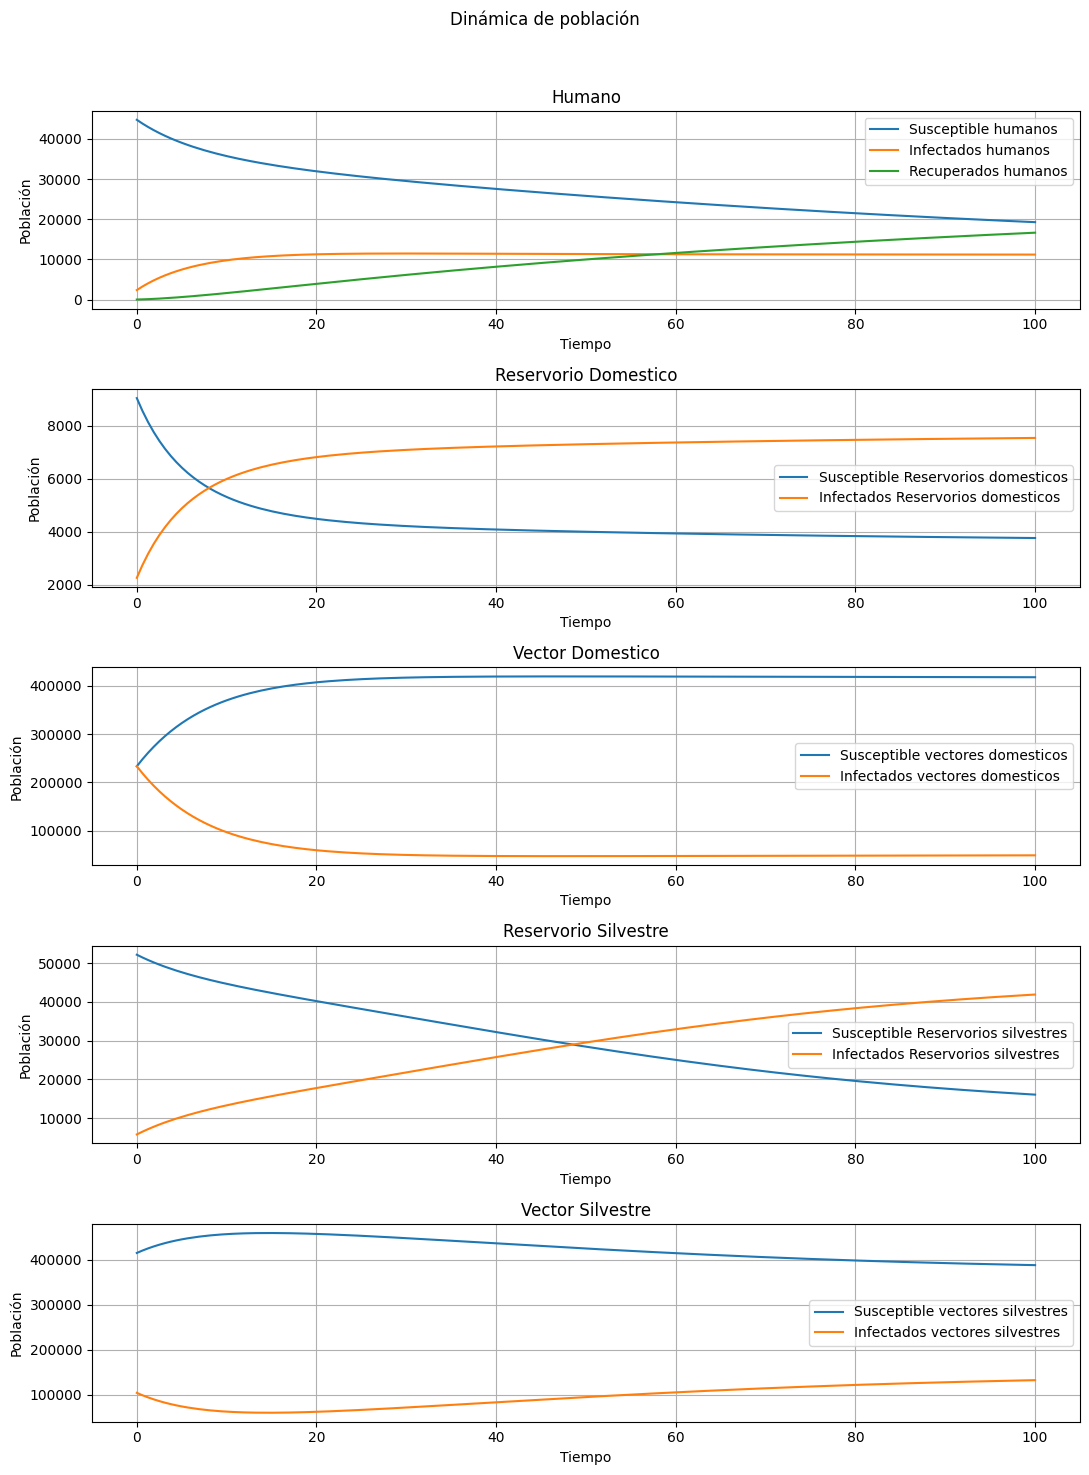

23.76392185421204
14.258353112527221
9.505568741684815
35.337729769817706
47128.999999999956


In [3]:
# Tercera parte: Graficas resultados de simulación

fig, axs = plt.subplots(5, 1, figsize=(11, 15))
fig.suptitle('Dinámica de población')

# Primer subplot
axs[0].plot(t, solution[:, 0], label='Susceptible humanos')
axs[0].plot(t, solution[:, 1], label='Infectados humanos')
axs[0].plot(t, solution[:, 2], label='Recuperados humanos')
axs[0].set_title('Humano')
axs[0].legend()

# Segundo subplot
axs[1].plot(t, solution[:, 3], label='Susceptible Reservorios domesticos')
axs[1].plot(t, solution[:, 4], label='Infectados Reservorios domesticos')
axs[1].set_title('Reservorio Domestico')
axs[1].legend()

# Tercer subplot
axs[2].plot(t, solution[:, 5], label='Susceptible vectores domesticos')
axs[2].plot(t, solution[:, 6], label='Infectados vectores domesticos')
axs[2].set_title('Vector Domestico')
axs[2].legend()

# Cuarto subplot
axs[3].plot(t, solution[:, 7], label='Susceptible Reservorios silvestres')
axs[3].plot(t, solution[:, 8], label='Infectados Reservorios silvestres')
axs[3].set_title('Reservorio Silvestre')
axs[3].legend()

# Quinto subplot
axs[4].plot(t, solution[:, 9], label='Susceptible vectores silvestres')
axs[4].plot(t, solution[:, 10], label='Infectados vectores silvestres')
axs[4].set_title('Vector Silvestre')
axs[4].legend()

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Población')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(100*solution[159, 1]/n_h)
print(100*0.6*solution[159, 1]/n_h)
print(100*0.4*solution[159, 1]/n_h)
print(100*solution[159, 2]/n_h)
print(solution[159, 0]+solution[159, 2]+solution[159, 1])

Text(0, 0.5, 'Porcentaje de la población total')

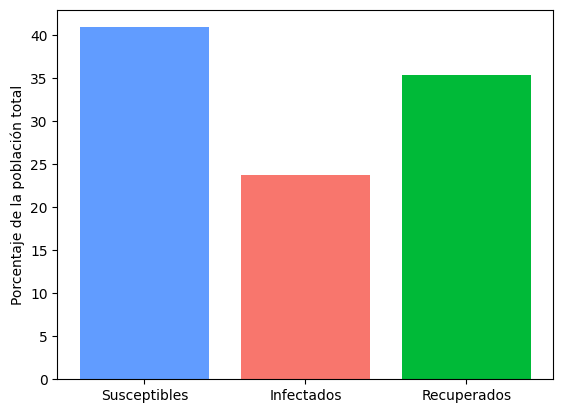

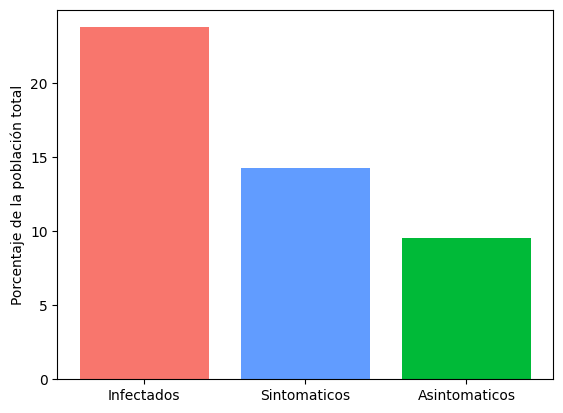

In [4]:
# Graficas del comportamiento de la enfermedad en humanos
x_1 = [solution[159, 0]*100/n_h, solution[159, 1]*100/n_h, solution[159, 2]*100/n_h]
x_2 = [solution[159, 1]*100/n_h, 0.6*solution[159, 1]*100/n_h, 0.4*solution[159, 1]*100/n_h]
y_1 =['Susceptibles', 'Infectados', 'Recuperados']
y_2 = ['Infectados', 'Sintomaticos','Asintomaticos']

colores1 = ["#619cff", "#f8766d", "#00ba38"]
colores2 = [ "#f8766d", "#619cff", "#00ba38"]
fig, ax = plt.subplots()
ax.bar(x = y_1, height = x_1, color = colores1)
ax.set_ylabel('Porcentaje de la población total')

fig, ax = plt.subplots()
ax.bar(x = y_2, height = x_2, color = colores2)
ax.set_ylabel('Porcentaje de la población total')